In [1]:
import torch
import numpy
import matplotlib.pyplot as plt
import torchvision
import torch.nn as nn
import torch.nn.functional as F

In [4]:
z = torch.zeros([5,2,3])
print(z)

tensor([[[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]],

        [[0., 0., 0.],
         [0., 0., 0.]]])


In [6]:
a = torch.tensor([[5,3],[2,7]])
print(a)
b = torch.reshape(a, [1,4])
print (b)
c = torch.squeeze(b)
print (c)

tensor([[5, 3],
        [2, 7]])
tensor([[5, 3, 2, 7]])
tensor([5, 3, 2, 7])


In [10]:
x = torch.tensor([[1.,-1.],[1., 1.]], requires_grad=True)
out = x.pow(2).sum()
out.backward()
x.grad

tensor([[ 2., -2.],
        [ 2.,  2.]])

In [12]:
#statements essentially represent datapoints, while truth represents labels
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, statements, truth):
        self.statements = statements
        self.truth = truth
    def __get_item__(self, index):
        return self. statements[index], self.truth[index]
    def __len__(self):
        return len(self.truth)

In [26]:
TrainDataset = torchvision.datasets.MNIST("./data", train=True, transform=torchvision.transforms.ToTensor(), download=True)
TestDataset = torchvision.datasets.MNIST("./data", transform=torchvision.transforms.ToTensor(), download=True)

torch.Size([16, 1, 28, 28]) torch.Size([16])
1


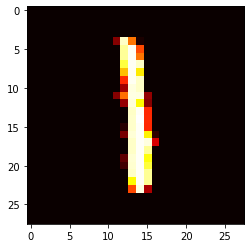

In [27]:
TrainDataLoader = torch.utils.data.DataLoader(TrainDataset, batch_size=16, shuffle=True)
TestDataLoader = torch.utils.data.DataLoader(TestDataset, batch_size=16, shuffle=True)
TrainIterator = iter(TrainDataLoader)
BatchOfSamples = TrainIterator.next()
Inputs, Labels = BatchOfSamples
print(Inputs.size(), Labels.size())
plt.imshow(Inputs[0].squeeze(), cmap="hot")
print(Labels[0].item())


In [28]:
class CustomModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(CustomModel, self).__init__()
        self.layer1 = nn.Linear(input_dim, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, output_dim)

    def forward(self, x):
        #define feedforward routine
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = self.layer3(x)
        return x

In [29]:
MyModel = CustomModel(784, 10)
Loss = nn.CrossEntropyLoss()
Optimizer = torch.optim.Adam(MyModel.parameters(), lr=0.01)

In [30]:
for epoch in range(10):
    for data in TrainIterator:
        batch_inputs, batch_labels = data
        batch_inputs = torch.reshape(batch_inputs, [16,784])
        Optimizer.zero_grad()
        predictions = MyModel(batch_inputs)
        current_loss = Loss(predictions, batch_labels)
        current_loss.backward()
        Optimizer.step()
    print("Epoch: {} Loss: {}".format(epoch+1, current_loss))


Epoch: 1 Loss: 0.05802251771092415
Epoch: 2 Loss: 0.05802251771092415
Epoch: 3 Loss: 0.05802251771092415
Epoch: 4 Loss: 0.05802251771092415
Epoch: 5 Loss: 0.05802251771092415
Epoch: 6 Loss: 0.05802251771092415
Epoch: 7 Loss: 0.05802251771092415
Epoch: 8 Loss: 0.05802251771092415
Epoch: 9 Loss: 0.05802251771092415
Epoch: 10 Loss: 0.05802251771092415


In [31]:
MyModel.eval()
correct = 0
total = 0
for data in iter(TestDataLoader):
    batch_inputs, batch_labels = data
    batch_inputs = torch.reshape(batch_inputs, [16,784])
    predictions = MyModel(batch_inputs).argmax(axis=1)
    total += len(batch_labels)
    correct += (predictions==batch_labels).sum().item()
print(100 *correct/total, "%")

94.62833333333333 %


In [32]:
torch.save(MyModel.state_dict(), "./MyModel.pt")